In [36]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

# 데이터 불러오기
data = []
with open('iris.data', 'r') as f:
    for line in f:
        if line.strip():
            item = line.strip().split(",")
            data.append(([float(val) for val in item[:-1]], item[-1]))

species = {s: i for i,s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]

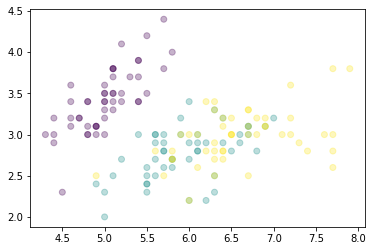

In [38]:
# 데이터 살펴보기
plt.scatter([d[0][0] for d in data], [d[0][1] for d in data], c=[d[1] for d in data], alpha = 0.3)

plt.show()

In [39]:
# 데이터 분리하기 
random.shuffle(data)
train = data[:-30]
test = data[-30:]

In [41]:
# Euclidian distance()
def distance(a,b):
    s = 0
    for i in range(len(a[0])):
        s += (a[0][i] - b[0][i]) ** 2
    return s ** 0.5

In [42]:
# knn_classify()
def knn_classify(k, query, train):
    knns = sorted((distance(point, query), point) for point in train)[:k]

    # 거리에 따라 가중치 주기
    scores = {}
    for dist, point in knns:
        scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)

    resp, score = max(scores.items(), key = lambda x: x[1])

    return resp


In [44]:
# test 해보기
k = 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1])
accuracy = correct/len(test)
print("accuracy: ", accuracy)

accuracy:  0.9333333333333333


100%|██████████| 100/100 [00:16<00:00,  6.14it/s]


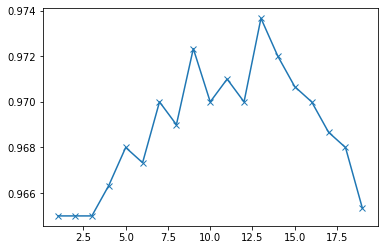

In [47]:
# 최적의 k 찾기
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size

corrects = [0]*20

for i in tqdm(range(num_trials)):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]

    for k in range(1,20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])

for k in range(1,20):
    corrects[k] /= num_trials * test_size
    
plt.plot(range(1,20), corrects[1:], '-x')
plt.show()
